In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pylab import rc, plot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
#Загружаем наш DataFrame с сайта bigML по оттоку клиентов телекома в США
df = pd.read_csv('telecom_churn.csv')

In [3]:
#Улучшаем таблицу, выполняем замену категориальных признаков при помощи LabelEncoder
le = LabelEncoder()
df['state'] = le.fit_transform(df['state'])
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
df['churn'] = le.fit_transform(df['churn'])
del df['phone number']
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [4]:
#Выборку разделим на обучающую и тестовую в процентном соотношении 70/30.
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.3, random_state=0)


In [5]:
# Используем алгоритм классификации "Логистическая регрессия"
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# Чтобы узнать метрики качества работы классификатора (Accuracy, recall, precison и F-меру) 
# используем функцию classification_report. Из-за того, что классы несбалансированы, видно, что работа классификатора 
# для Churned оставляет желать лучшего. Также видно, что метрика Accuracy является не лучшей для неравных классов, ведь
# если посмотреть на неё, то можно сказать, что классификатор работает хорошо везде.
report = classification_report(y_test, lr.predict(X_test), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.86      0.99      0.92       855
     Churned       0.62      0.07      0.12       145

    accuracy                           0.86      1000
   macro avg       0.74      0.53      0.52      1000
weighted avg       0.83      0.86      0.81      1000



Confusion matrix, without normalization
[[849   6]
 [135  10]]


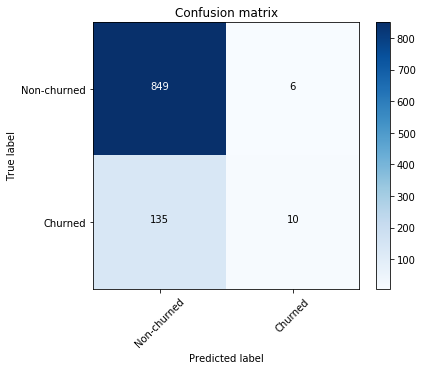

In [7]:
#Построим матрицу ошибок с определением нормализации. Видим, что класс Non-churned хорошо классифицирован.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(6, 5))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                     title='Confusion matrix')
plt.show()

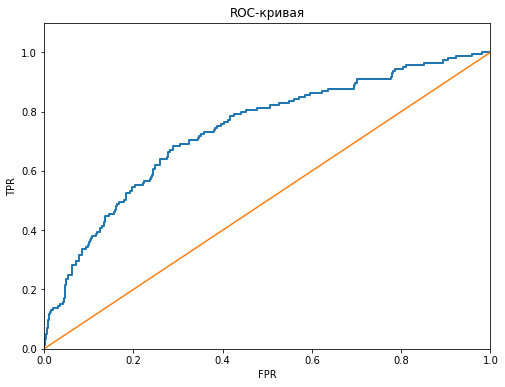

In [8]:
#Также построим график ROC-кривой.
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC-кривая')
roc_auc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show()

In [9]:
#Площадь под ROC-кривой
roc_auc = auc(fpr, tpr)
print('ROC-AUC = ', roc_auc)

ROC-AUC =  0.7363742690058479
